# @ OASIS INFOBYTE (OIBSIP)
### Author : Yukti Pant

# TASK 3 : Car Price Prediction With Machine Learning

### Problem Statement:

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you. 

In [1]:
# Importing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing dataframe:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# Shape of dataframe:
data.shape

(301, 9)

In [4]:
# Checking columns in dataframe:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# Checking Data types of each column:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [6]:
# Checking for null values:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Checking for duplicates:
data.duplicated().sum()

2

In [8]:
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [9]:
data_no_duplicates = data.drop_duplicates(keep='first')
data_no_duplicates

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

### Model buliding

In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [20]:
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [21]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
linear_pred=linear.predict(X_test)

In [25]:
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.50
The Train_accuracy: 87.75


In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 1.8531
R2_score LinearRegression 0.875005
mean_absolute_error LinearRegression 1.233813


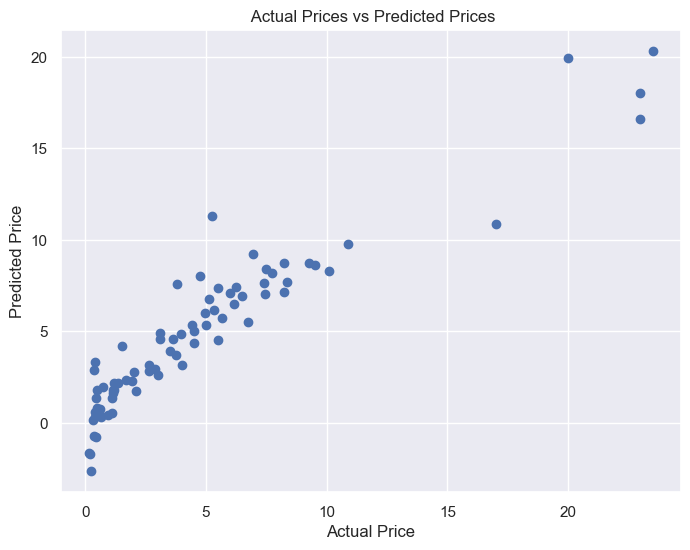

In [29]:
plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()